 In the real-world applications of machine learning, it is very common that there are many relevant features available for learning but only a small subset of them are observable. So, for the variables which are sometimes observable and sometimes not, then we can use the instances when that variable is visible is observed for the purpose of learning and then predict its value in the instances when it is not observable.

On the other hand, Expectation-Maximization algorithm can be used for the latent variables (variables that are not directly observable and are actually inferred from the values of the other observed variables) too in order to predict their values with the condition that the general form of probability distribution governing those latent variables is known to us. This algorithm is actually at the base of many unsupervised clustering algorithms in the field of machine learning.


Algorithm:

Given a set of incomplete data, consider a set of starting parameters.
Expectation step (E – step): Using the observed available data of the dataset, estimate (guess) the values of the missing data.
Maximization step (M – step): Complete data generated after the expectation (E) step is used in order to update the parameters.
Repeat step 2 and step 3 until convergence.

# 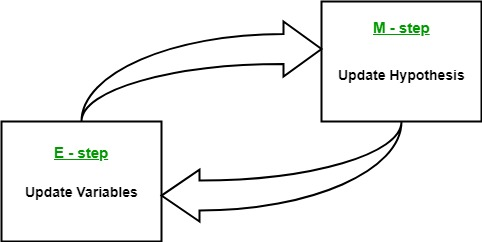

 The essence of Expectation-Maximization algorithm is to use the available observed data of the dataset to estimate the missing data and then using that data to update the values of the parameters. Let us understand the EM algorithm in detail.

1.Initially, a set of initial values of the parameters are considered. A set of incomplete observed data is given to the system with the assumption that the observed data comes from a specific model.

2.The next step is known as “Expectation” – step or E-step. In this step, we use the observed data in order to estimate or guess the values of the missing or incomplete data. It is basically used to update the variables.

3.The next step is known as “Maximization”-step or M-step. In this step, we use the complete data generated in the preceding “Expectation” – step in order to update the values of the parameters. It is basically used to update the hypothesis.

4.Now, in the fourth step, it is checked whether the values are converging or not, if yes, then stop otherwise repeat step-2 and step-3 i.e. “Expectation” – step and “Maximization” – step until the convergence occurs.

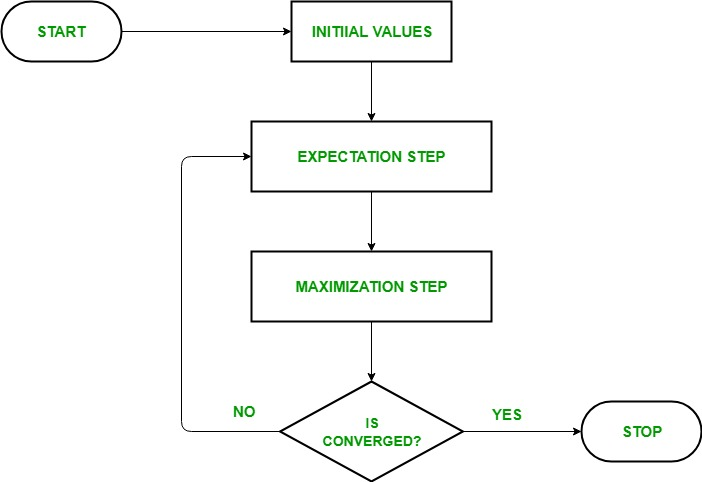

# Usage of EM algorithm –

1.It can be used to fill the missing data in a sample.

2.It can be used as the basis of unsupervised learning of clusters.

3.It can be used for the purpose of estimating the parameters of Hidden Markov Model (HMM).

4.It can be used for discovering the values of latent variables.

# Advantages of EM algorithm –

It is always guaranteed that likelihood will increase with each iteration.

The E-step and M-step are often pretty easy for many problems in terms of implementation.

Solutions to the M-steps often exist in the closed form.

# Disadvantages of EM algorithm –

It has slow convergence.

It makes convergence to the local optima only.

It requires both the probabilities, forward and backward (numerical optimization requires only forward probability).


# Basic example of Expectation Maximization
Let's try this on a simple basic example.

Objective: Let's etimate the probability distribution in a 1-dimensional dataset

that we generated ourselves using 2 gaussian normal probability distributions.

Using a Gaussian mixture model with 2 normal gaussian distributions

Or in other words, we should be able to find our own mean and standard deviation parameters we used to generate the testset.

# Gaussian Mixture Model of 2 Gaussians
Two Normal distributions  N(μ1,σ21)  and  N(μ2,σ22) .


There are 5 paramaters to estimate:
θ=(w,μ1,σ21,μ2,σ22)
where  w  is the probability that the data comes from the first normal probability distribution (and 1- w ) it comes from the second normal probability distribution)

The probability density function (PDF) of the mixture model is:

f(x|θ)=w f1(x | μ1,σ21)+(1−w) f2(x | μ2,σ22)
 
Objective is to best fit a given probability density by finding  θ=(w,μ1,σ21,μ2,σ22)  through EM iterations

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
#for data preprocessing
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform
print("import done")

import done


Input Gaussian 1: μ = 2.0, σ = 4.0
Input Gaussian 2: μ = 9.0, σ = 2.0


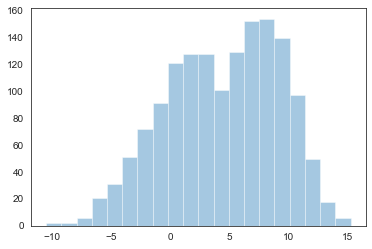

In [13]:
random_seed=36788765
np.random.seed(random_seed)

Mean1 = 2.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 4.0 #@param {type:"number"}
Mean2 = 9.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 1000)
y2 = np.random.normal(Mean2, Standard_dev2, 500)
data=np.append(y1,y2)

# For data visiualisation calculate left and right of the graph
Min_graph = min(data)
Max_graph = max(data)
x = np.linspace(Min_graph, Max_graph, 2000) # to plot the data

print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
sns.distplot(data, bins=20, kde=False);

In [14]:
class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)
print("done")




done


Best single Gaussian: μ = 4.4, σ = 4.8


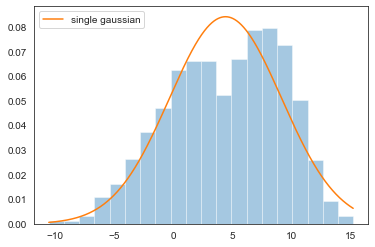

In [15]:
#gaussian of best fit
best_single = Gaussian(np.mean(data), np.std(data))
print('Best single Gaussian: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))
#fit a single gaussian curve to the data
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
sns.distplot(data, bins=20, kde=False, norm_hist=True);
plt.plot(x, g_single, label='single gaussian');
plt.legend();

In [17]:
class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        #todo the Algorithm would be numerical enhanced by normalizing the data first, next do all the EM steps and do the de-normalising at the end
        
        #init with multiple gaussians
        self.one = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        
        #as well as how much to mix them
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for datum in self.data:  
            # unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den   
            wp2 /= den     # wp1+wp2= 1, it either belongs to gaussian 1 or gaussion 2
            # add into loglike
            self.loglike += log(den) #freshening up self.loglike in the process
            # yield weight tuple
            yield (wp1, wp2)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # compute denominators
        (left, rigt) = zip(*weights) 
        one_den = sum(left)
        two_den = sum(rigt)

        # compute new means
        self.one.mu = sum(w * d  for (w, d) in zip(left, data)) / one_den
        self.two.mu = sum(w * d  for (w, d) in zip(rigt, data)) / two_den
        
        # compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        # compute new mix
        self.mix = one_den / len(data)

        
    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N+1):
            self.Mstep(self.Estep()) #The heart of the algorith, perform E-stepand next M-step
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() # to freshen up self.loglike

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)
        
    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)
print("done")

done


In [18]:
# See the algorithem in action
n_iterations = 20
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture_self(data)
for _ in range(n_iterations):
    try:
        #train!
        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix
        
    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        print("one less")
        pass

 1 Mixture: Gaussian(-1.09794, 2.37082), Gaussian(7.1497, 2.924), mix=0.327)
 1 Mixture: Gaussian(-0.844218, 2.63801), Gaussian(7.0736, 3.08726), mix=0.331)
 1 Mixture: Gaussian(-0.697622, 2.76065), Gaussian(7.06479, 3.14079), mix=0.337)
 1 Mixture: Gaussian(-0.598795, 2.83056), Gaussian(7.07977, 3.15566), mix=0.343)
 1 Mixture: Gaussian(-0.523921, 2.87517), Gaussian(7.10587, 3.15309), mix=0.348)
 1 Mixture: Gaussian(-0.462175, 2.90621), Gaussian(7.13775, 3.14159), mix=0.354)
 1 Mixture: Gaussian(-0.408057, 2.92957), Gaussian(7.17275, 3.12524), mix=0.359)
 1 Mixture: Gaussian(-0.358563, 2.94844), Gaussian(7.20942, 3.10616), mix=0.365)
 1 Mixture: Gaussian(-0.311986, 2.96467), Gaussian(7.2469, 3.08557), mix=0.37)
 1 Mixture: Gaussian(-0.267326, 2.97934), Gaussian(7.2847, 3.06418), mix=0.375)
 1 Mixture: Gaussian(-0.223991, 2.99309), Gaussian(7.32249, 3.0424), mix=0.381)
 1 Mixture: Gaussian(-0.181625, 3.00631), Gaussian(7.3601, 3.02051), mix=0.386)
 1 Mixture: Gaussian(-0.140016, 3.0192

Computing best model with random restarts...

Input Gaussian 1: μ = 2.0, σ = 4.0
Input Gaussian 2: μ = 9.0, σ = 2.0
Gaussian 1: μ = 8.5, σ = 2.4, weight = 0.44
Gaussian 2: μ = 1.2, σ = 3.6, weight = 0.56


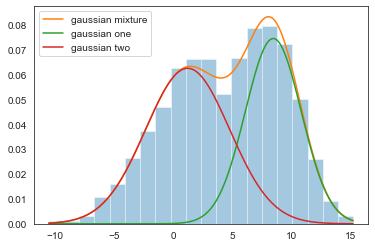

In [19]:
n_random_restarts = 4
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture_self(data)
    for _ in range(n_iterations):
        try:
            mix.iterate()
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
            pass
#print('Best Gaussian Mixture : μ = {:.2}, σ = {:.2} with μ = {:.2}, σ = {:.2}'.format(best_mix.one.mu, best_mix.one.sigma, best_mix.two.mu, best_mix.two.sigma))

print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("1", best_mix.one.mu, best_mix.one.sigma, best_mix.mix))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("2", best_mix.two.mu, best_mix.two.sigma, (1-best_mix.mix)))
#Show mixture
sns.distplot(data, bins=20, kde=False, norm_hist=True);
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
g_left = [best_mix.one.pdf(e) * best_mix.mix for e in x]
plt.plot(x, g_left, label='gaussian one');
g_right = [best_mix.two.pdf(e) * (1-best_mix.mix) for e in x]
plt.plot(x, g_right, label='gaussian two');
plt.legend();


Input Gaussian 1: μ = 2.0, σ = 4.0
Input Gaussian 2: μ = 9.0, σ = 2.0
Gaussian 1: μ = 1.7, σ = 3.8, weight = 0.61
Gaussian 2: μ = 8.8, σ = 2.2, weight = 0.39


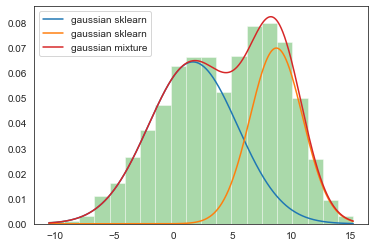

In [20]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 2, tol=0.000001)
gmm.fit(np.expand_dims(data, 1)) # Parameters: array-like, shape (n_samples, n_features), 1 dimension dataset so 1 feature
Gaussian_nr = 1
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    g_s = stats.norm(mu, sd).pdf(x) * p
    plt.plot(x, g_s, label='gaussian sklearn');
    Gaussian_nr += 1
sns.distplot(data, bins=20, kde=False, norm_hist=True)
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x]) #gmm gives log probability, hence the exp() function
plt.plot(x, gmm_sum, label='gaussian mixture');
plt.legend();